#Introduction
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
!gdown --id 1Cax1YVByC4w_xHjHYmH3blqzQExceAPE
df = pd.read_csv('housing[1].csv')

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Cax1YVByC4w_xHjHYmH3blqzQExceAPE
To: /content/housing[1].csv
100% 1.42M/1.42M [00:00<00:00, 129MB/s]


In [3]:
df.shape

(20640, 10)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
mapping={'<1H OCEAN':1, 'INLAND':2, 'NEAR OCEAN':3, 'NEAR BAY':4, 'ISLAND':5}
df['ocean_proximity']=df['ocean_proximity'].map(mapping)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [8]:
# check for missing values
df.isna().sum().sort_values(ascending=False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
#Lets look at the discription also
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000
ocean_proximity,20640.0,1.908769,1.004549,1.0000,1.0000,2.0000,2.00000,5.0000


In [10]:
#get the median for the null bedrooms
bedroom_median = df['total_bedrooms'].median()
bedroom_median

435.0

In [11]:
df['total_bedrooms'].fillna(bedroom_median, inplace=True)

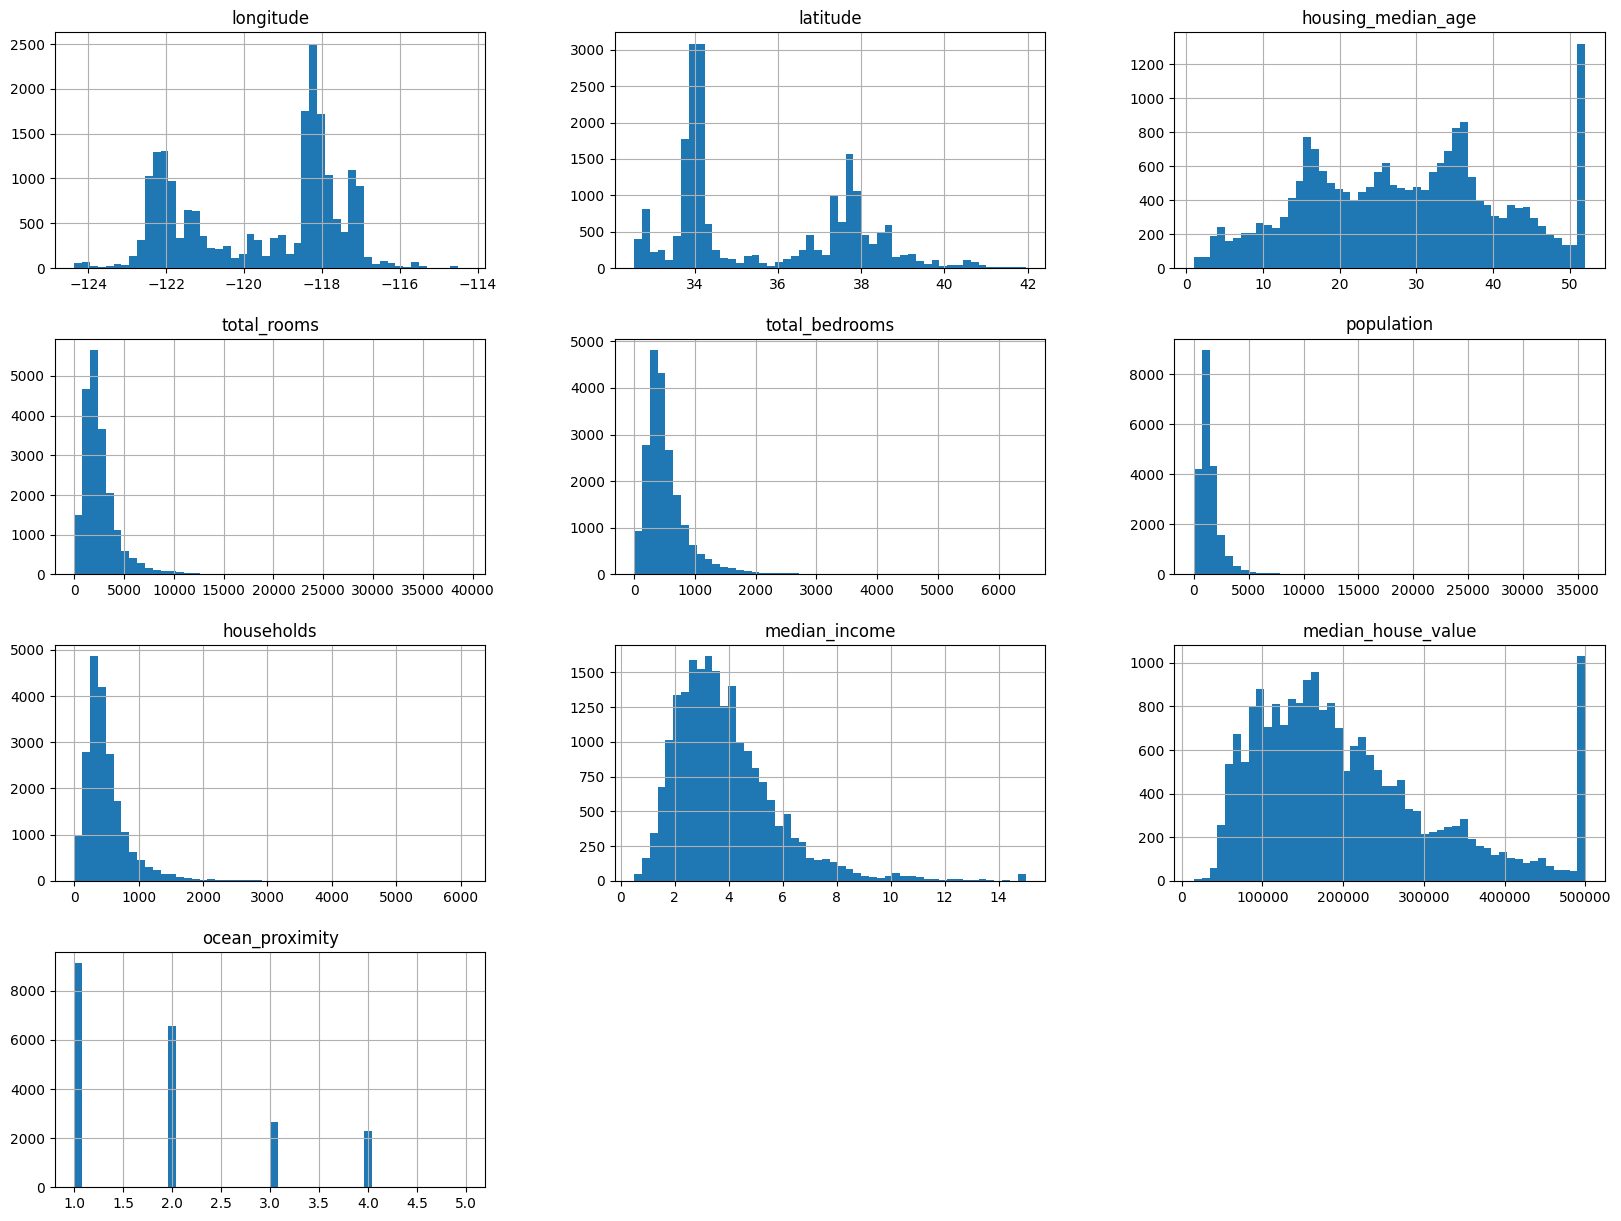

In [12]:
%matplotlib inline
df.hist(bins=50, figsize=(20, 15));

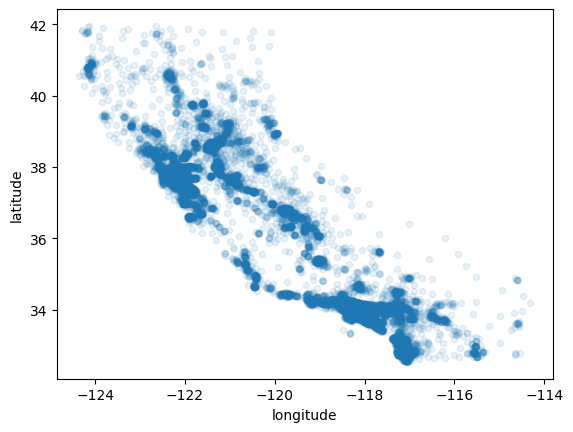

In [13]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

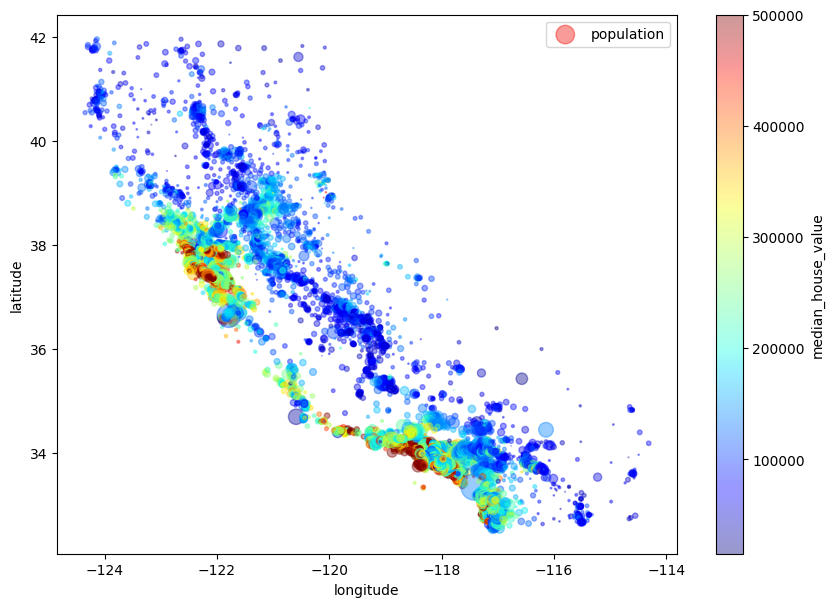

In [14]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend();

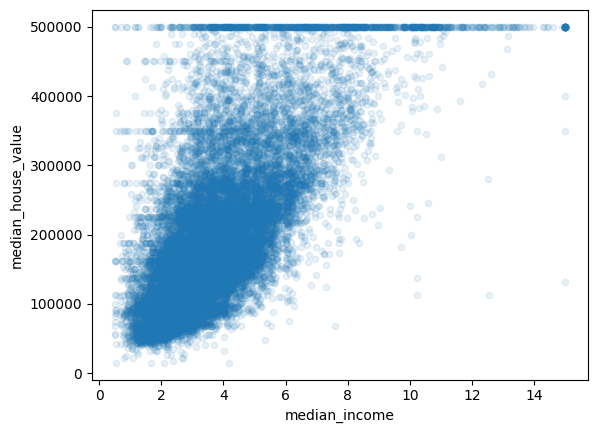

In [15]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1);

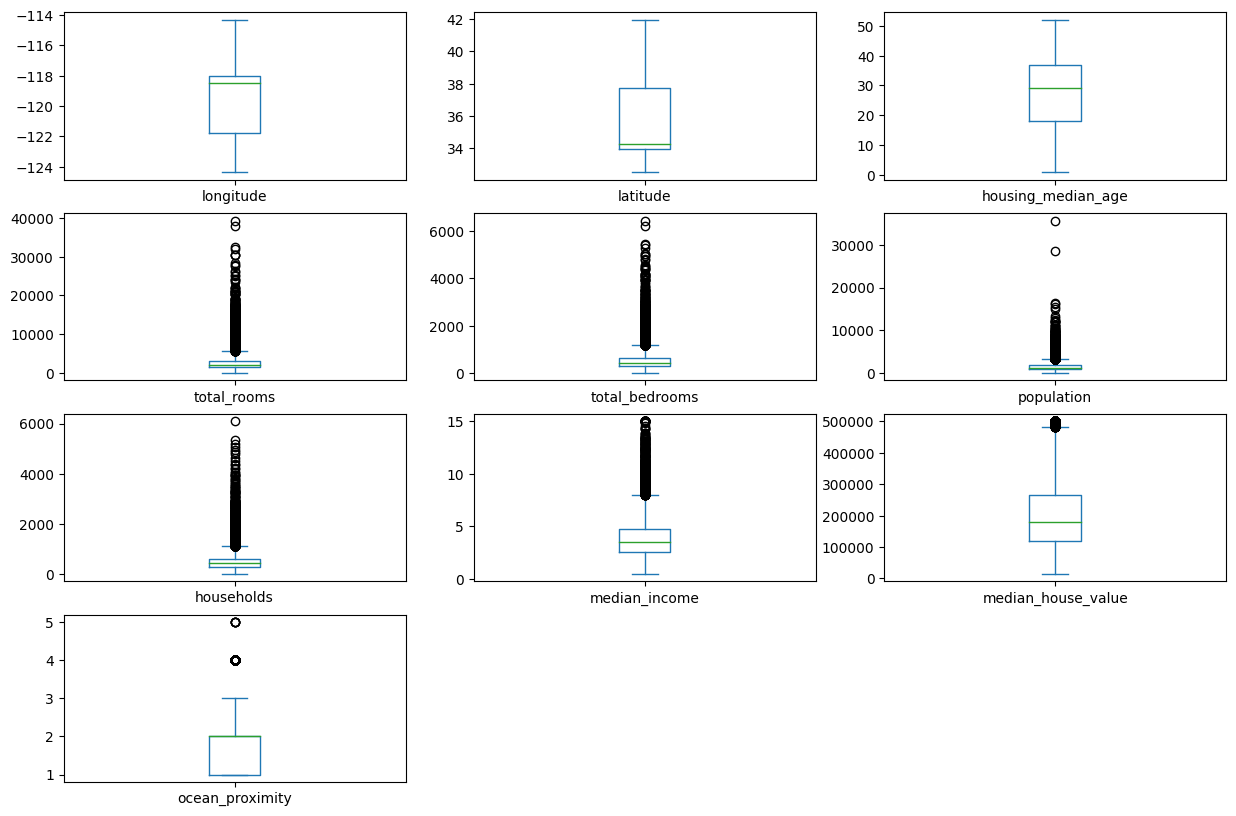

In [16]:
df.plot(kind='box', subplots=True, layout=(4,3), figsize=(15, 10))
plt.show()

In [17]:
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column longitude outliers = 0.00%
Column latitude outliers = 0.00%
Column housing_median_age outliers = 0.00%
Column total_rooms outliers = 6.24%
Column total_bedrooms outliers = 6.33%
Column population outliers = 5.80%
Column households outliers = 5.91%
Column median_income outliers = 3.30%
Column median_house_value outliers = 5.19%
Column ocean_proximity outliers = 11.12%


In [18]:
# outlier handling
df['total_bedrooms'] = np.where(df['total_bedrooms'] > 500, 500, df['total_bedrooms'])
df['population'] = np.where(df['population'] > 50000, 50000, df['population'])
df['households'] = np.where(df['households'] > 50000, 50000, df['households'])
df['median_income'] = np.where(df['median_income'] > 15, 15, df['median_income'])
df['median_house_value'] = np.where(df['median_house_value'] > 500000, 500000, df['median_house_value'])

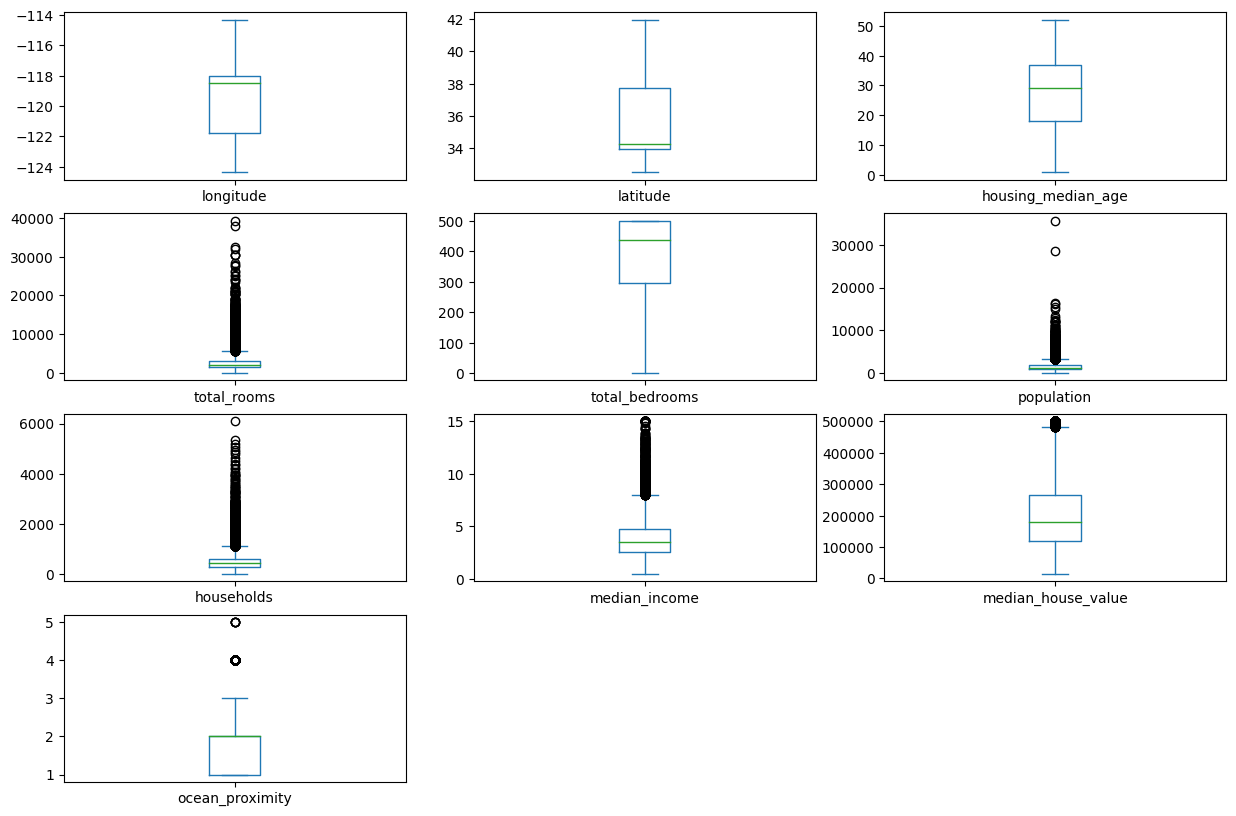

In [19]:
df.plot(kind='box', subplots=True, layout=(4,3), figsize=(15, 10))
plt.show()

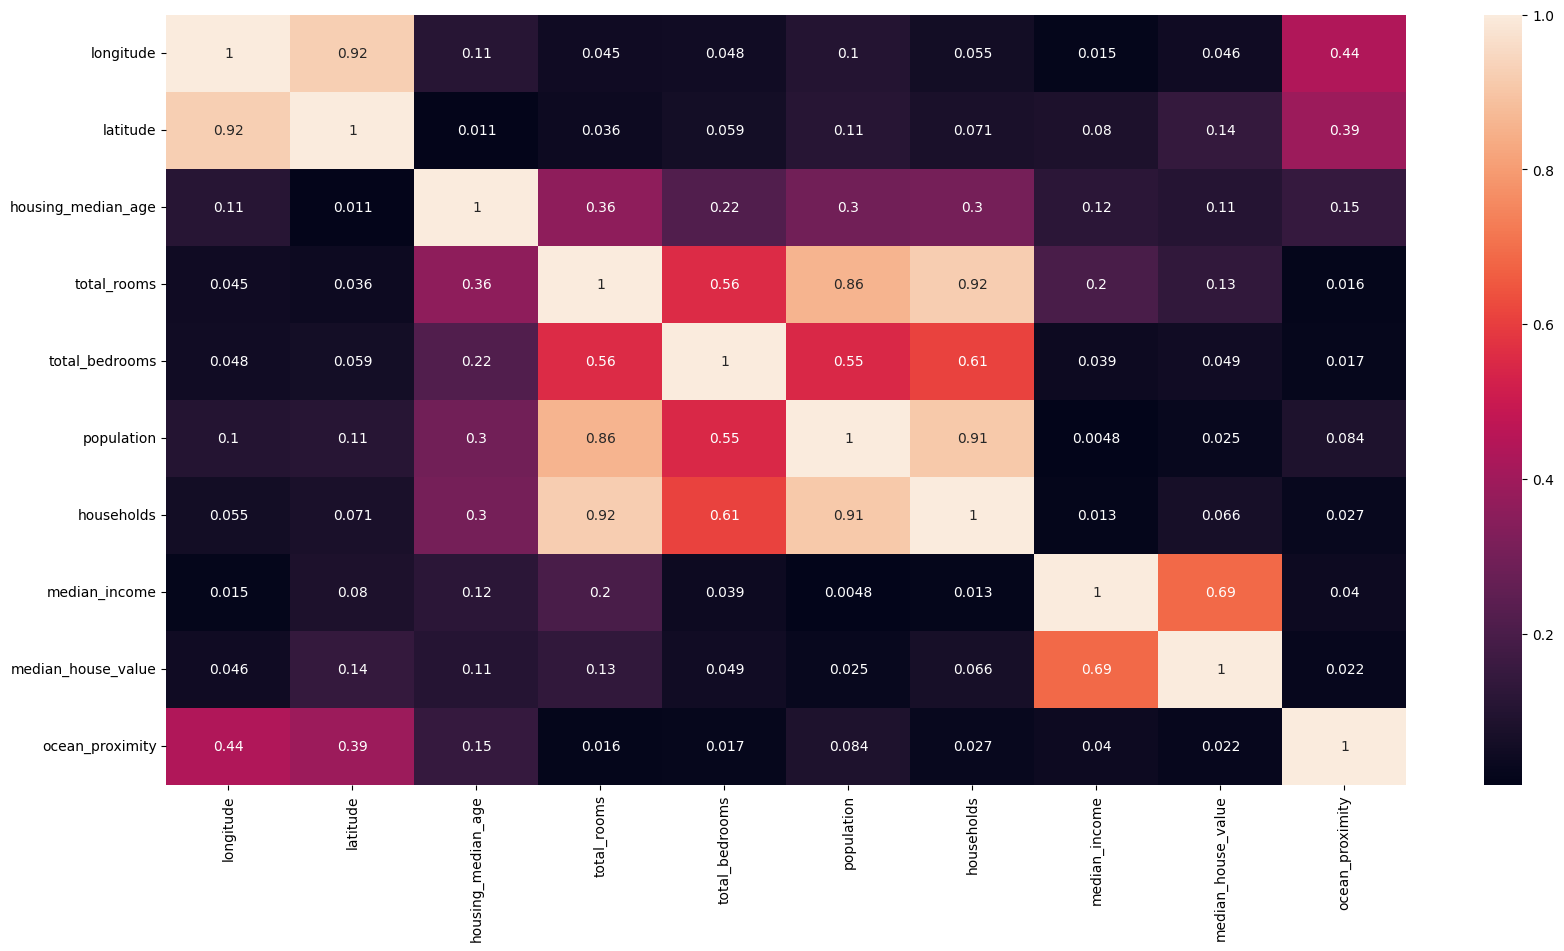

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs() ,  annot=True);

In [21]:
# define x , y
X = df.drop(columns=["median_house_value" ]).astype(float)
y = df['median_house_value'].astype(float)

In [22]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
# Actual train,test and val
y_actual_train=y_train
y_actual_test=y_test

In [24]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 1) longitude                      38950.721229
 2) latitude                       1179.909204
 3) housing_median_age             136.775703
 4) total_rooms                    56.073992
 5) total_bedrooms                 -1.968870
 6) population                     -42.646658
 7) households                     -796.059865
 8) median_income                  -41989.051513
 9) ocean_proximity                -42096.631443


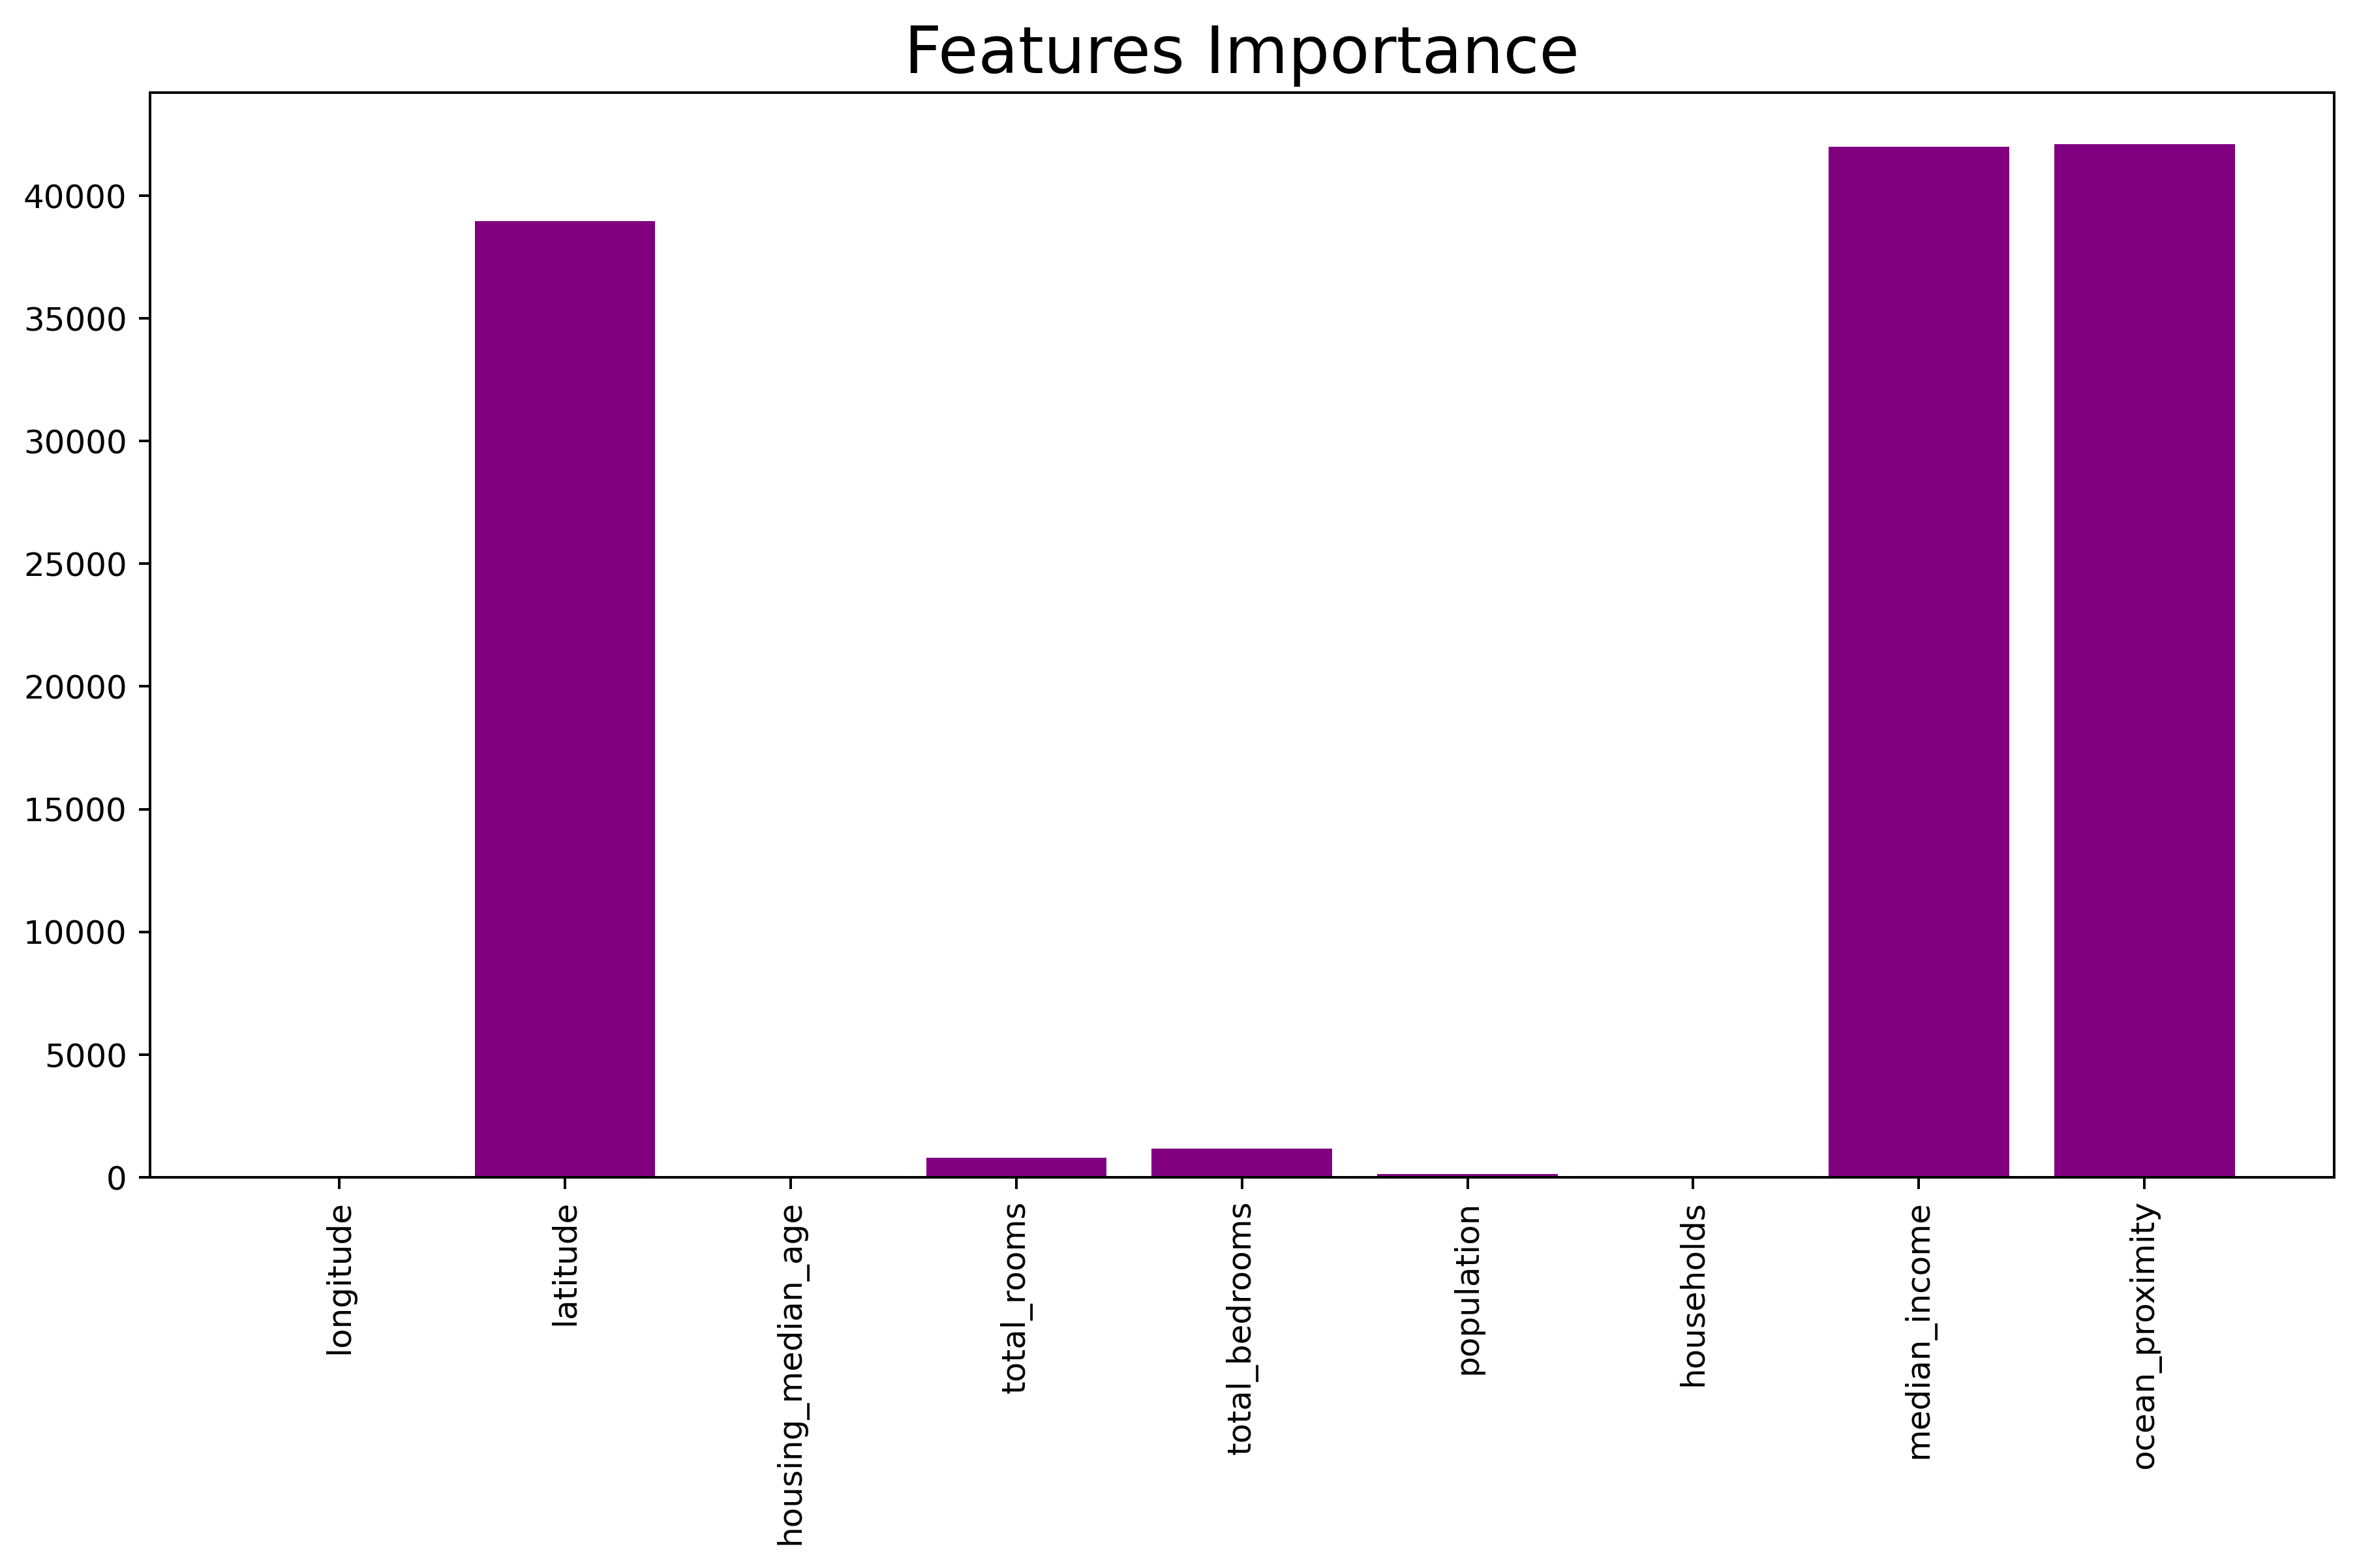

In [26]:
from sklearn.linear_model import LinearRegression
# Assuming 'df' is your DataFrame and you dropped 'median_house_value'
features_label = df.drop(columns=["median_house_value"]).columns

#create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# access features importance insights (coefficients)
importances = pd.Series(model.coef_, index=features_label)
indices = np.argsort(importances)[::-1]
for i in range(X_train.shape[1]):
  print("%2d) %-*s %f" %(i + 1, 30, features_label[i],importances[indices[i]]))

#sort the coefficients by absolute values to get the most influential features
importances = importances.abs().sort_values(ascending=False)

#Visualation of Features importance
plt.figure(figsize=(12, 6), dpi = 360)
plt.bar(range(X_train.shape[1]), importances[indices], color = 'purple', align= 'center')
plt.xticks(range(X_train.shape[1]), features_label, rotation = 90, fontsize = 10)
plt.title('Features Importance', fontsize = 20)
plt.show()

In [27]:
#Linear regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [28]:
#predicted values
y_pred = LR.predict(X_test)

In [29]:
# Regression Score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
train_score = LR.score(X_train, y_train)
test_score = LR.score(X_test, y_test)
print(f'The Linear Regression train R2 is: {train_score}')
print(f'The Linear Regression test R2 is: {test_score}')
print(f'The Linear Regression MSE is: {mean_squared_error(y_test, y_pred)}')
print(f'The Linear Regression MAE is: {mean_absolute_error(y_test, y_pred)}')

The Linear Regression train R2 is: 0.6357965103146079
The Linear Regression test R2 is: 0.6297755431382138
The Linear Regression MSE is: 4856190616.535571
The Linear Regression MAE is: 50927.01492655436


In [30]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
train_r2_ridge = ridge_model.score(X_train, y_train)
test_r2_ridge = ridge_model.score(X_test, y_test)

print(f"The Ridge Regression train R2 is: {train_r2_ridge}")
print(f"The Ridge Regression test R2 is: {test_r2_ridge}")


The Ridge Regression train R2 is: 0.6357965068231931
The Ridge Regression test R2 is: 0.6297759905034533


In [31]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=4)
DT_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [32]:
# Predict Value
y_predict_dt = DT_model.predict(X_test)
y_predict_dt

array([226964.5925458 ,  93073.04521556, 320085.96112311, ...,
       320085.96112311, 226964.5925458 ,  93073.04521556])

In [33]:
## Score
train_data_score_dt = DT_model.score(X_train , y_train)
test_data_score_dt = DT_model.score(X_test , y_test)

print(f'The Decision tree regressor train R^2 is: {train_data_score_dt}')
print(f'The Decision tree regressor test R^2 is: {test_data_score_dt}')

The Decision tree regressor train R^2 is: 0.5988019927109876
The Decision tree regressor test R^2 is: 0.5912269139583097


In [34]:
#Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=5)
RF_model.fit(X_train, y_train)
y_pr_f=RF_model.predict(X_test)
y_pr_f

array([366160.,  61840., 234620., ..., 331340., 227340.,  95400.])

In [35]:
train_data_score_forest = RF_model.score(X_train , y_train)
test_data_score_forest = RF_model.score(X_test, y_test)
print(f'The Random Forest regressor train R^2 is: {train_data_score_forest}')
print(f'The Random Forest regressor test R^2 is: {test_data_score_forest}')

The Random Forest regressor train R^2 is: 0.953292304466748
The Random Forest regressor test R^2 is: 0.7767607569916015
